In [1]:
#Imorting liraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lyon_ts = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\Lyon.csv')

In [4]:
lyon_ts.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,conditions,description,date,pm25,pm10,o3,no2,so2,co,City
0,45.7592,4.82966,Lyon,2014-01-01,1388530800,11.9,8.2,9.8,68.37,0.33,...,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,2014-01-01,26.0,10.0,23.0,14.0,NaN,NaN,Lyon
1,45.7592,4.82966,Lyon,2014-01-02,1388617200,12.1,8.4,10.5,78.29,11.94,...,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,2014-01-02,31.0,11.0,10.0,15.0,NaN,NaN,Lyon
2,45.7592,4.82966,Lyon,2014-01-03,1388703600,10.7,8.5,10.0,86.57,15.77,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,2014-01-03,36.0,7.0,15.0,11.0,NaN,NaN,Lyon
3,45.7592,4.82966,Lyon,2014-01-04,1388790000,11.6,5.3,9.5,86.54,19.85,...,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,2014-01-04,23.0,10.0,20.0,15.0,NaN,NaN,Lyon
4,45.7592,4.82966,Lyon,2014-01-05,1388876400,9.6,1.1,5.3,83.87,14.64,...,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,2014-01-05,33.0,15.0,17.0,16.0,1.0,NaN,Lyon


In [5]:
lyon_ts.isna().sum()

latitude             0
longitude            0
address              0
datetime             0
datetimeEpoch        0
tempmax              0
tempmin              0
temp                 0
humidity             0
precip               1
precipcover          1
snow              2922
snowdepth         2749
windgust             1
windspeed            0
pressure             1
cloudcover           0
visibility           0
solarradiation    1826
solarenergy       1826
uvindex              0
conditions           0
description          0
date                54
pm25               299
pm10               104
o3                  92
no2                 85
so2               2480
co                2922
City                54
dtype: int64

In [6]:
# For time series analysis I just need the date column and the columns with pollutions. I can drop all the rest 
lyon_ts =lyon_ts[['datetime', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]

In [7]:
lyon_ts.tail()

,datetime,pm25,pm10,o3,no2,so2,co
2917,2021-12-27,43.0,13.0,9.0,13.0,NaN,NaN
2918,2021-12-28,25.0,7.0,16.0,11.0,NaN,NaN
2919,2021-12-29,31.0,9.0,7.0,16.0,NaN,NaN
2920,2021-12-30,47.0,14.0,4.0,15.0,NaN,NaN
2921,2021-12-31,65.0,20.0,3.0,13.0,NaN,NaN


In [8]:
#I need to convert datetime to datetime object 

lyon_ts.datetime= pd.to_datetime(lyon_ts.datetime)

In [9]:
lyon_ts.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
so2                float64
co                 float64
dtype: object

Missing values


In [10]:
lyon_ts.isna().sum()

datetime       0
pm25         299
pm10         104
o3            92
no2           85
so2         2480
co          2922
dtype: int64

In [11]:
# I will drop columns with two pollutants so2 and co as they have too much missing values, so they won't be useful for my analysis 
lyon_ts.drop(columns=['so2','co'], inplace=True)

In [12]:
#I will fill empty values with the mean for each month, to do that I create a new column year-month thanks to which I will be able to calaculate a mean value for each month of each year
lyon_ts['year_month']=lyon_ts['datetime'].dt.to_period('M')

In [13]:
#Now I create new df with average values of all pollutants for each month
avg_year_months = lyon_ts.groupby('year_month').agg('mean')
avg_year_months

,pm25,pm10,o3,no2
year_month,,,,
2014-01,46.535714,17.178571,14.566667,17.321429
2014-02,34.142857,13.428571,19.071429,16.250000
2014-03,77.129032,30.741935,27.612903,18.225806
2014-04,43.833333,17.366667,31.333333,10.700000
2014-05,34.806452,12.433333,35.838710,7.533333
...,...,...,...,...
2021-08,NaN,12.290323,32.931034,4.451613
2021-09,NaN,14.800000,30.100000,7.566667
2021-10,NaN,15.290323,21.935484,8.225806


In [14]:
#I need a polutant list as I will iterate through them
pollutants = avg_year_months.columns.tolist()
pollutants

['pm25', 'pm10', 'o3', 'no2']

In [15]:
# I am filling a missing values in data with average values of each pollutant in the same month and in the same year 
for i in range(len(pollutants)):
	for year_month in lyon_ts.year_month.unique():
		mean = avg_year_months.loc[year_month][i]
		lyon_ts.loc[lyon_ts.year_month==year_month, pollutants[i]] = lyon_ts.loc[lyon_ts.year_month==year_month, pollutants[i]].fillna(mean)

In [16]:
lyon_ts.isna().sum()

datetime        0
pm25          215
pm10           31
o3             31
no2            31
year_month      0
dtype: int64

In [17]:
lyon_ts.year_month[lyon_ts['pm25'].isna()].unique()


<PeriodArray>
['2015-01', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']
Length: 7, dtype: period[M]

In [18]:
#For month of January 2015 I will fill it with the avreage for each day in 2014 and 2016
# I create additional columns to help me fill missing values
lyon_ts['year']=lyon_ts['datetime'].dt.year
lyon_ts['month_day'] = lyon_ts['datetime'].dt.strftime('%m-%d')

In [19]:
# I am taking values only for 2 years 2016 and 2018
lyon14_16 = lyon_ts.loc[(lyon_ts['year']==2014) |(lyon_ts['year']==2016)]

In [20]:
averge_for_days = lyon14_16.groupby('month_day').agg('mean')
averge_for_days

,pm25,pm10,o3,no2,year
month_day,,,,,
01-01,36.879310,14.400000,18.816667,15.900000,2015.0
01-02,39.379310,12.000000,13.500000,15.000000,2015.0
01-03,36.500000,8.000000,17.500000,13.500000,2015.0
01-04,23.000000,10.500000,19.000000,18.000000,2015.0
01-05,28.500000,13.500000,15.500000,18.500000,2015.0
...,...,...,...,...,...
12-27,48.000000,18.500000,15.500000,9.000000,2015.0
12-28,56.000000,28.740741,7.727273,17.092593,2015.0
12-29,75.660714,35.740741,6.227273,17.592593,2015.0


In [21]:
for i in range(len(pollutants)):
	for month_day in lyon_ts.month_day.unique():
		mean = averge_for_days.loc[month_day][i]
		lyon_ts.loc[(lyon_ts.month_day==month_day) & (lyon_ts.year==2015), pollutants[i]] = lyon_ts.loc[(lyon_ts.month_day==month_day) & (lyon_ts.year==2015), pollutants[i]].fillna(mean)

In [22]:
lyon_ts.isna().sum()

datetime        0
pm25          184
pm10            0
o3              0
no2             0
year_month      0
year            0
month_day       0
dtype: int64

In [41]:
#the rest of the values will be filled from the same source but diffrent database
missing_pm=pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\04-1- Data Cleaniang TS\miss25.csv')

In [42]:
missing_pm

,datetime,pm25
2377,2021-05-01,39.0
2378,2021-05-02,39.0
2379,2021-05-03,41.0
2380,2021-05-04,31.0
2381,2021-05-05,23.0
...,...,...
4661,2021-10-05,NaN
4662,2021-10-08,NaN
4663,2021-10-24,NaN
4827,2021-10-06,NaN


In [43]:
lyon_ts.loc[lyon_ts.pm25.isna()]

,datetime,pm25,pm10,o3,no2,year_month,year,month_day
2830,2021-10-01,NaN,14.0,34.0,7.0,2021-10,2021,10-01
2831,2021-10-02,NaN,14.0,35.0,2.0,2021-10,2021,10-02
2832,2021-10-03,NaN,11.0,35.0,2.0,2021-10,2021,10-03
2833,2021-10-04,NaN,4.0,20.0,8.0,2021-10,2021,10-04
2834,2021-10-05,NaN,7.0,14.0,10.0,2021-10,2021,10-05
2835,2021-10-06,NaN,7.0,21.0,7.0,2021-10,2021,10-06
2836,2021-10-07,NaN,7.0,25.0,4.0,2021-10,2021,10-07
2837,2021-10-08,NaN,10.0,15.0,5.0,2021-10,2021,10-08
2838,2021-10-09,NaN,19.0,11.0,7.0,2021-10,2021,10-09
2839,2021-10-10,NaN,21.0,21.0,5.0,2021-10,2021,10-10


In [44]:
for date in missing_pm['datetime']:
	x=missing_pm['pm25'].loc[missing_pm['datetime']==date].tolist()[0]
	
	lyon_ts['pm25'].loc[lyon_ts['datetime']==date]=lyon_ts['pm25'].loc[lyon_ts['datetime']==date].fillna(x)

C:\Users\radek\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
lyon_ts.isna().sum()

datetime       0
pm25          26
pm10           0
o3             0
no2            0
year_month     0
year           0
month_day      0
dtype: int64

In [46]:
#Now for these 31 missing values I can redo the procedure for avreage value in a month 
avg_year_months = lyon_ts.groupby('year_month').agg('mean')
avg_year_months

,pm25,pm10,o3,no2,year
year_month,,,,,
2014-01,46.535714,17.178571,14.566667,17.321429,2014.0
2014-02,34.142857,13.428571,19.071429,16.250000,2014.0
2014-03,77.129032,30.741935,27.612903,18.225806,2014.0
2014-04,43.833333,17.366667,31.333333,10.700000,2014.0
2014-05,34.806452,12.433333,35.838710,7.533333,2014.0
...,...,...,...,...,...
2021-08,30.129032,12.290323,32.931034,4.451613,2021.0
2021-09,34.466667,14.800000,30.100000,7.566667,2021.0
2021-10,23.800000,15.290323,21.935484,8.225806,2021.0


In [47]:
for i in range(len(pollutants)):
	for year_month in lyon_ts.year_month.unique():
		mean = avg_year_months.loc[year_month][i]
		lyon_ts.loc[lyon_ts.year_month==year_month, pollutants[i]] = lyon_ts.loc[lyon_ts.year_month==year_month, pollutants[i]].fillna(mean)

In [48]:
lyon_ts.isna().sum()

datetime      0
pm25          0
pm10          0
o3            0
no2           0
year_month    0
year          0
month_day     0
dtype: int64

In [50]:
# I am dropping the columns which I won't need anymore and which were used only to fill missing values
lyon_ts.drop(columns=['year_month', 'year', 'month_day'], inplace=True)

Outliers

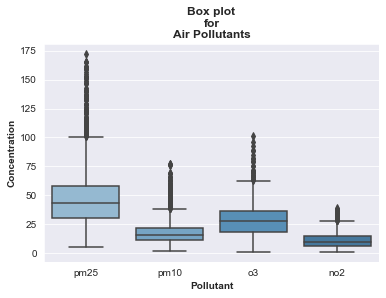

In [52]:
# I am checking for the outliers by plooting box plot
sns.set_palette("Blues_d")
sns.set_style('darkgrid')
sns.boxplot(data=lyon_ts)
plt.title('Box plot\nfor\nAir Pollutants', fontweight='bold')
plt.ylabel('Concentration', fontweight='bold')
plt.xlabel('Pollutant', fontweight='bold')
plt.show()

Saving file

In [49]:
#now the data is clean so I can save it and put it in anext step
lyon_ts.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Lyon_clean_for_ts.csv', index_label=False)